In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ironhack-final-project')

In [4]:
import you_nlp

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/raw_data/GBvideos_final_cleaned.csv")

In [6]:
data_nlp, frq = you_nlp.get_key_words(data, "en")

In [7]:
stop_words = list(stopwords.words('english')) 

In [10]:
key_word_df, final_freq = you_nlp.create_keywords_df(data_nlp, frq, stop_words, "GB_EN")

In [9]:
final_freq

[('music', 30601),
 ('official', 22801),
 ('new', 21621),
 ('nfollow', 15665),
 ('live', 12773),
 ('youtube', 11325),
 ('star', 10008),
 ('news', 9868),
 ('twitter', 9861),
 ('ntwitter', 9503),
 ('video', 9156),
 ('late', 8659),
 ('facebook', 8652),
 ('ninstagram', 8583),
 ('instagram', 8444),
 ('nsubscribe', 8325),
 ('nfacebook', 8325),
 ('nthe', 7034),
 ('subscribe', 6843),
 ('full', 6457),
 ('funny', 6213),
 ('nwatch', 6095),
 ('entertainment', 5582),
 ('film', 5493),
 ('tmz', 5393),
 ('best', 5275),
 ('com', 5219),
 ('jimmy', 5134),
 ('comedy', 5116),
 ('available', 5037),
 ('tv', 5005),
 ('nlike', 4762),
 ('ft', 4753),
 ('james', 4652),
 ('makeup', 4569),
 ('nget', 4332),
 ('game', 4298),
 ('christmas', 4283),
 ('got', 4274),
 ('every', 4157),
 ('nand', 4115),
 ('feat', 4028),
 ('jedi', 3991),
 ('nmusic', 3807),
 ('series', 3801),
 ('lil', 3635),
 ('celebrity', 3620),
 ('interview', 3600),
 ('nbc', 3590),
 ('follow', 3525),
 ('online', 3494)]

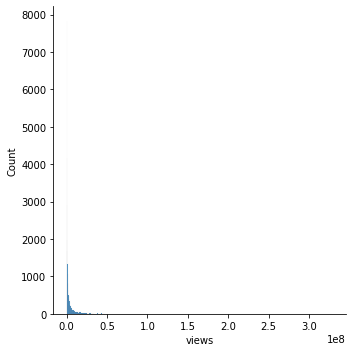

In [11]:
sns.displot(key_word_df["views"])

In [12]:
key_word_df_outl = you_nlp.remove_outliers(key_word_df)

category_id
14.0
45.0
-11.0
views
3176012.0
8184735.0
-4519313.0
likes
99367.0
254282.5
-143185.5
dislikes
2910.0
7473.0
-4167.0
comment_count
7965.0
20583.5
-11276.5
likes_rate
0.0297693116893663
0.08899743851796785
-0.030079808239497345
dislikes_rate
0.0010030786627683
0.00297622215511945
-0.00103609249595375
music
1.0
2.5
-1.5
official
1.0
2.5
-1.5
new
1.0
2.5
-1.5
nfollow
1.0
2.5
-1.5
live
youtube
star
news
twitter
ntwitter
video
2.0
5.0
-3.0
late
facebook
ninstagram
instagram
nsubscribe
nfacebook
nthe
subscribe
full
funny
nwatch
entertainment
film
tmz
best
com
jimmy
comedy
available
tv
nlike
ft
james
makeup
nget
game
christmas
got
every
nand
feat
jedi
nmusic
series
lil
celebrity
interview
nbc
follow
online
0 rows have been removed, 0.0% in total


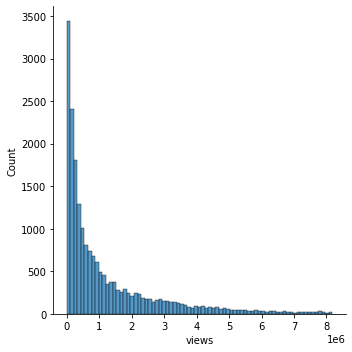

In [13]:
sns.displot(key_word_df_outl["views"])

In [14]:
key_word_df_outl["views"].describe()

count    2.024000e+04
mean     1.231208e+06
std      1.567261e+06
min      8.510000e+02
25%      1.772452e+05
50%      5.654140e+05
75%      1.666846e+06
max      8.181005e+06
Name: views, dtype: float64

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


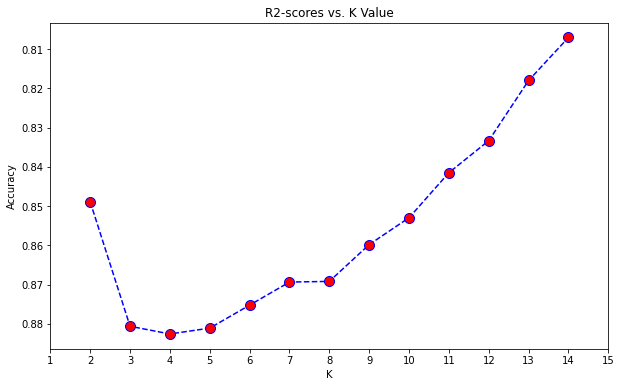

Please enter k:4


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8852082213516089
MSE: 13052426991.486885
RMSE: 114247.21874727141
MAE: 27332.710719110426
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.8976638896730582
MSE: 12299318377.701336
RMSE: 110902.29203087435
MAE: 27789.30738377027
-----------------------------
Filename Linear: GB_EN_Likes_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.13112007596696929
MSE: 98796202187.50536
RMSE: 314318.63162642036
MAE: 145311.58969110204
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.12470558523693842
MSE: 105197712195.63782
RMSE: 324341.9679838516
MAE: 143552.70784344902
-----------------------------
Filename Linear: GB_EN_Likes_l

In [15]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes", "GB_EN_Likes")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


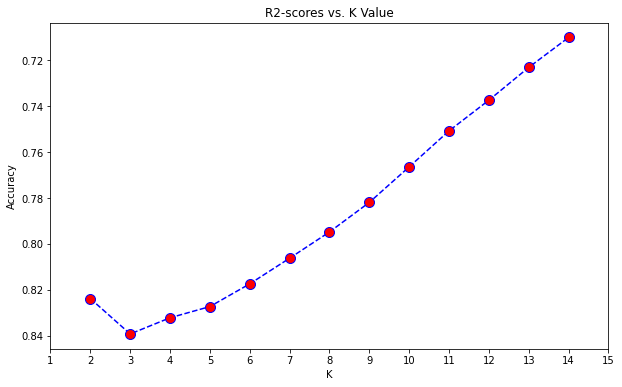

Please enter k:3


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.9009581053776325
MSE: 216649001.3008389
RMSE: 14719.001369007305
MAE: 6180.596656253288
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.8661386679302826
MSE: 284487027.31450367
RMSE: 16866.74323378712
MAE: 6704.8217220066335
-----------------------------
Filename Linear: GB_EN_Likes_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.20338181472939787
MSE: 1742560912.3796575
RMSE: 41743.99253041876
MAE: 28644.972015501236
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.1939112162293425
MSE: 1713129537.1171348
RMSE: 41389.96903981851
MAE: 28370.87408272488
-----------------------------
Filename Linear: GB_EN_Likes_O

In [18]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes", "GB_EN_Likes_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


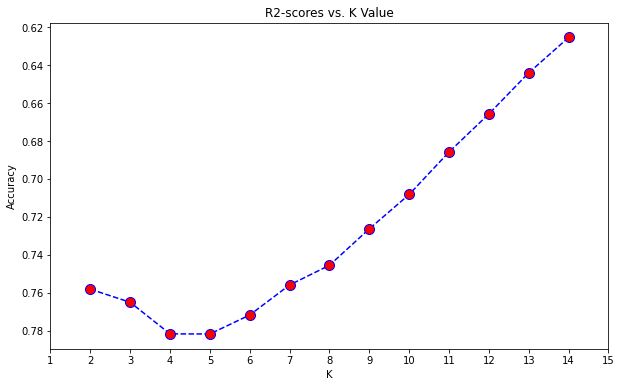

Please enter k:4


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8489117332318351
MSE: 0.00011854828416803443
RMSE: 0.010887988067959774
MAE: 0.005321920386885059
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.8278049308319372
MSE: 0.00012758748222131897
RMSE: 0.011295462904251378
MAE: 0.005811243535757934
-----------------------------
Filename Linear: GB_EN_Likes_Rate_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.1326639879232503
MSE: 0.0006805372662499114
RMSE: 0.02608710919687943
MAE: 0.018418533721029848
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.1363671210117261
MSE: 0.0006399065032815685
RMSE: 0.025296373322703167
MAE: 0.018124874856793403
-------------------------

In [19]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes_rate", "GB_EN_Likes_Rate")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


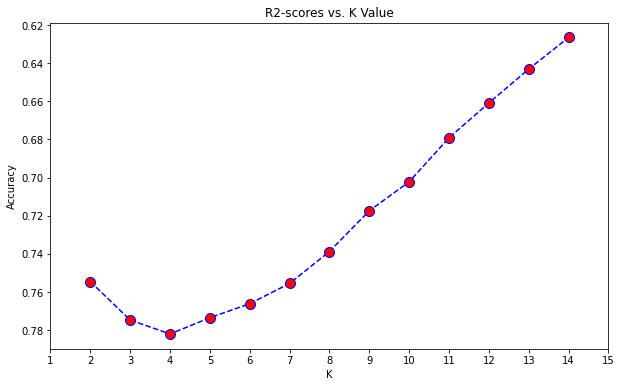

Please enter k:4


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8546068877226418
MSE: 5.571422584771026e-05
RMSE: 0.007464196262673581
MAE: 0.003904630326214445
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.8272092164413712
MSE: 6.63108384708296e-05
RMSE: 0.008143146717997263
MAE: 0.004265636146342712
-----------------------------
Filename Linear: GB_EN_Likes_Rate_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.18495495307906995
MSE: 0.0003123229368223784
RMSE: 0.017672660717118358
MAE: 0.01403630132513087
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.1921765867560914
MSE: 0.0003100133396315977
RMSE: 0.017607195677665357
MAE: 0.013910842656042685
-----------------------

In [21]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes_rate", "GB_EN_Likes_Rate_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


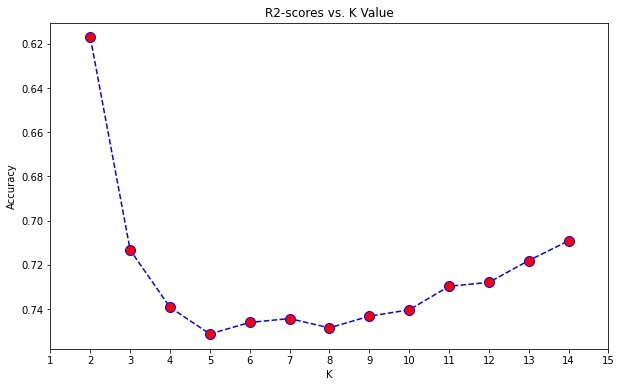

Please enter k:5


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.7649972477524286
MSE: 53869017980852.305
RMSE: 7339551.6198779
MAE: 1868309.1764613374
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7829073622485629
MSE: 56486707580165.43
RMSE: 7515763.938560433
MAE: 1917780.8750279073
-----------------------------
Filename Linear: GB_EN_Views_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.10529501533539054
MSE: 205090699770534.8
RMSE: 14320988.086390367
MAE: 6183479.807953901
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.10433281224921409
MSE: 233049315018942.22
RMSE: 15265952.80416333
MAE: 6199334.1905594915
-----------------------------
Filename Linear: GB_EN_Views_linear

In [22]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "views", "GB_EN_Views")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


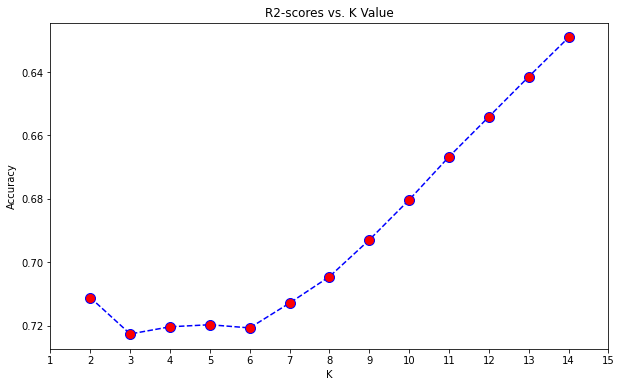

Please enter k:3


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8162712876152229
MSE: 454076591090.81256
RMSE: 673852.05430481
MAE: 320914.4421642548
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7663061766428145
MSE: 565601042879.5708
RMSE: 752064.5204233283
MAE: 351031.0438276365
-----------------------------
Filename Linear: GB_EN_Views_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.1836666819713414
MSE: 2017528155686.4502
RMSE: 1420397.182370639
MAE: 1012782.6294202487
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.164036378955991
MSE: 2023253713253.6746
RMSE: 1422411.232117377
MAE: 1007377.461095113
-----------------------------
Filename Linear: GB_EN_Views_Out_lin

In [23]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "views", "GB_EN_Views_Out")

In [ ]:
max_depth_choices=[3,4,5,6,7,8,9,10,None]
min_sample_split=[5 , 10, 15]
min_sample_leaf=[5, 10, 15]
max_samples=[0.2, 0.6, 0.8, 0.9]
random_state=[5, 10, 13]

In [ ]:
random_forest = {'max_depth': max_depth_choices,    
                'min_samples_split': min_sample_split,
                'min_samples_leaf': min_sample_leaf,
                'max_samples': max_samples,
                'random_state': random_state
               }